In [1]:

from concurrent.futures import ThreadPoolExecutor
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, RobustScaler, StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.ensemble import GradientBoostingRegressor, HistGradientBoostingRegressor, BaggingRegressor, ExtraTreesRegressor
from sklearn.svm import NuSVR, LinearSVR
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression, BayesianRidge, ElasticNet, SGDRegressor, LassoLars, Lasso, Ridge, ARDRegression, RANSACRegressor, HuberRegressor, TheilSenRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor, XGBRFRegressor
import time
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
MODELS = {DecisionTreeRegressor, ExtraTreesRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor, BaggingRegressor, NuSVR,
          LinearRegression, BayesianRidge, KNeighborsRegressor, XGBRegressor, XGBRFRegressor, MLPRegressor,
          ElasticNet, SGDRegressor, KernelRidge, LassoLars, Lasso, LinearSVR, Ridge, ARDRegression, RANSACRegressor, HuberRegressor, TheilSenRegressor}


In [3]:
housing = pd.read_csv(r'./datasets/kc_house_data.csv').sample(10000)
quality = pd.read_csv(r'./datasets/winequality-red.csv')


In [4]:
housing


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
13238,2623039018,20141027T000000,685000.0,4,1.00,1550,15239,1.5,1,4,...,6,1370,180,1930,0,98166,47.4502,-122.378,1790,22047
8699,7550801207,20150428T000000,536500.0,2,2.00,1360,1860,1.0,0,0,...,7,680,680,1925,0,98107,47.6727,-122.396,1440,5000
109,3134100116,20140827T000000,470000.0,5,1.75,2030,12342,2.0,0,0,...,7,2030,0,1942,0,98052,47.6417,-122.109,2500,9433
21180,3862700020,20150423T000000,433190.0,3,2.50,1650,2787,2.0,0,0,...,8,1650,0,2014,0,98065,47.5336,-121.838,1760,2787
16196,7527410080,20140602T000000,585083.0,5,2.75,2910,36250,1.0,0,0,...,8,1590,1320,1977,0,98075,47.5916,-122.076,2910,37376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1119,3343900326,20150311T000000,552500.0,4,3.50,3710,10400,2.0,0,0,...,8,2290,1420,2002,0,98056,47.5041,-122.186,1720,4276
1966,1972202080,20140710T000000,725000.0,2,1.75,1950,2719,1.0,0,0,...,7,1010,940,1919,0,98103,47.6513,-122.346,1360,1256
15276,8651720420,20150428T000000,513000.0,4,2.50,1930,8040,1.0,0,0,...,7,1380,550,1978,0,98034,47.7283,-122.218,2080,7200
15802,2044500213,20150126T000000,449000.0,4,2.00,1870,6000,1.5,0,0,...,7,1870,0,1956,0,98125,47.7155,-122.315,1520,7169


In [5]:
quality


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [6]:
housing = housing.dropna()
housing.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 13238 to 16274
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             10000 non-null  int64  
 1   date           10000 non-null  object 
 2   price          10000 non-null  float64
 3   bedrooms       10000 non-null  int64  
 4   bathrooms      10000 non-null  float64
 5   sqft_living    10000 non-null  int64  
 6   sqft_lot       10000 non-null  int64  
 7   floors         10000 non-null  float64
 8   waterfront     10000 non-null  int64  
 9   view           10000 non-null  int64  
 10  condition      10000 non-null  int64  
 11  grade          10000 non-null  int64  
 12  sqft_above     10000 non-null  int64  
 13  sqft_basement  10000 non-null  int64  
 14  yr_built       10000 non-null  int64  
 15  yr_renovated   10000 non-null  int64  
 16  zipcode        10000 non-null  int64  
 17  lat            10000 non-null  float64
 18  lo

In [7]:
quality.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
def metrics(tt, tp, vt, vp, model,
            time=None): return {
    "model": model,
    'time': time,
    "mse": (mean_squared_error(tt, tp),
            mean_squared_error(vt, vp)),
    'r2': (r2_score(tt, tp),
           r2_score(vt, vp))
}


def create_model(X, y, model_name,
                 time_it: bool = False):
    model = model_name()
    if time_it == True:
        begin = time.perf_counter()
        model.fit(X, y)
        end = time.perf_counter()
        return (model, end - begin)
    return model.fit(X, y)


def get_metrics(model_name):
    Xt, Xv, yt, yv = train_test_split(
        housing_X, housing_y, train_size=.7)
    results = create_model(Xt, yt, model_name, time_it=True)
    model, time = results[0], results[1]
    return metrics(
        yt, model.predict(Xt), yv,
        model.predict(Xv), model_name, time)


def get_results(X, y, models):
    results = []
    with ThreadPoolExecutor(max_workers=len(models)) as executor:
        res = executor.map(get_metrics, models)
        results = [i for i in res if i]
    return results


def plot_results(results: 'list[dict]'):
    y = [i['model'] for i in results]
    pos = np.arange(len(y))
    plt.barh(pos, [i['mse'][1] for i in results], align='center',)
    plt.yticks(pos, y)
    plt.title('MSE Validation')
    plt.show()
    plt.barh(pos, [i['mse'][0] for i in results], align='center',)
    plt.yticks(pos, y)
    plt.title('MSE Traning')
    plt.show()
    plt.barh(pos, [i['time'] for i in results], align='center',)
    plt.yticks(pos, y)
    plt.title('Time')
    plt.show()
    plt.barh(pos, [i['r2'][1] for i in results], align='center',)
    plt.yticks(pos, y)
    plt.title('R2')
    plt.show()
    plt.barh(pos, [i['time'] * i['mse'][1] * -
             1 for i in results], align='center',)
    plt.yticks(pos, y)
    plt.title('Efficiency (Higher the better)')
    plt.show()
    plt.barh(pos, [-1 * i['time'] * i['mse'][1] / (i['mse']
             [1] - i['mse'][0]) for i in results], align='center')
    plt.yticks(pos, y)
    plt.title('Weighted Efficiency (Higher the better)')
    plt.show()


In [9]:
housing.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 13238 to 16274
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             10000 non-null  int64  
 1   date           10000 non-null  object 
 2   price          10000 non-null  float64
 3   bedrooms       10000 non-null  int64  
 4   bathrooms      10000 non-null  float64
 5   sqft_living    10000 non-null  int64  
 6   sqft_lot       10000 non-null  int64  
 7   floors         10000 non-null  float64
 8   waterfront     10000 non-null  int64  
 9   view           10000 non-null  int64  
 10  condition      10000 non-null  int64  
 11  grade          10000 non-null  int64  
 12  sqft_above     10000 non-null  int64  
 13  sqft_basement  10000 non-null  int64  
 14  yr_built       10000 non-null  int64  
 15  yr_renovated   10000 non-null  int64  
 16  zipcode        10000 non-null  int64  
 17  lat            10000 non-null  float64
 18  lo

In [10]:
quality_X = quality.drop(['quality'], axis=1)
quality_y = quality['quality']
housing_X = housing\
    .drop(['id', 'date', 'zipcode',
           'lat', 'long', 'price'], axis=1)
housing_y = housing['price']


In [11]:
housing_y


13238    685000.0
8699     536500.0
109      470000.0
21180    433190.0
16196    585083.0
           ...   
1119     552500.0
1966     725000.0
15276    513000.0
15802    449000.0
16274    160000.0
Name: price, Length: 10000, dtype: float64

In [12]:
housing_X = MinMaxScaler().fit_transform(
    RobustScaler().fit_transform(housing_X))


In [13]:
housing_results = get_results(
    housing_X, housing_y, MODELS)


c:\Users\Admin\Desktop\aitfdl\variational-gradient-boosting\env\lib\site-packages\sklearn\linear_model\_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
c:\Users\Admin\Desktop\aitfdl\variational-gradient-boosting\env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterat

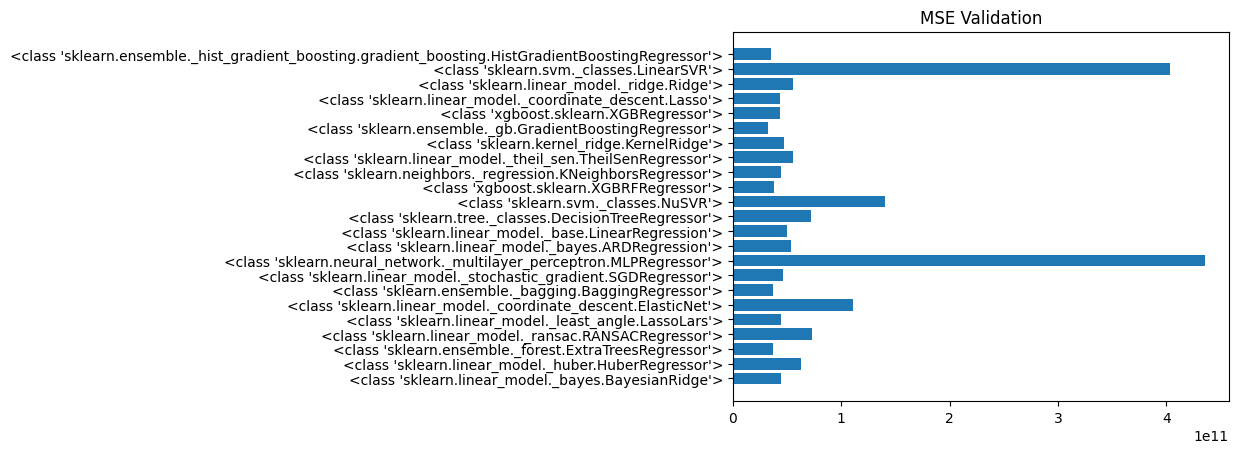

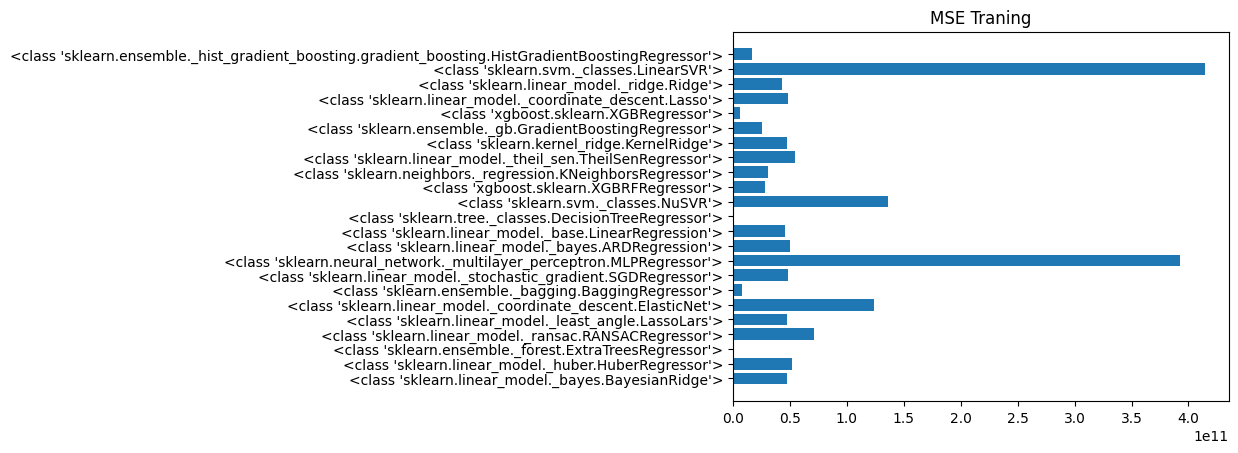

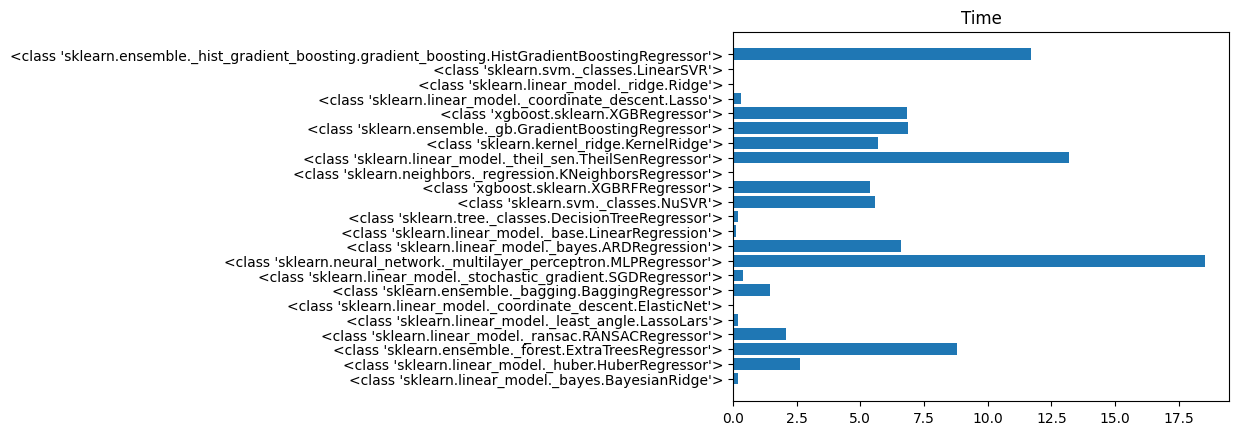

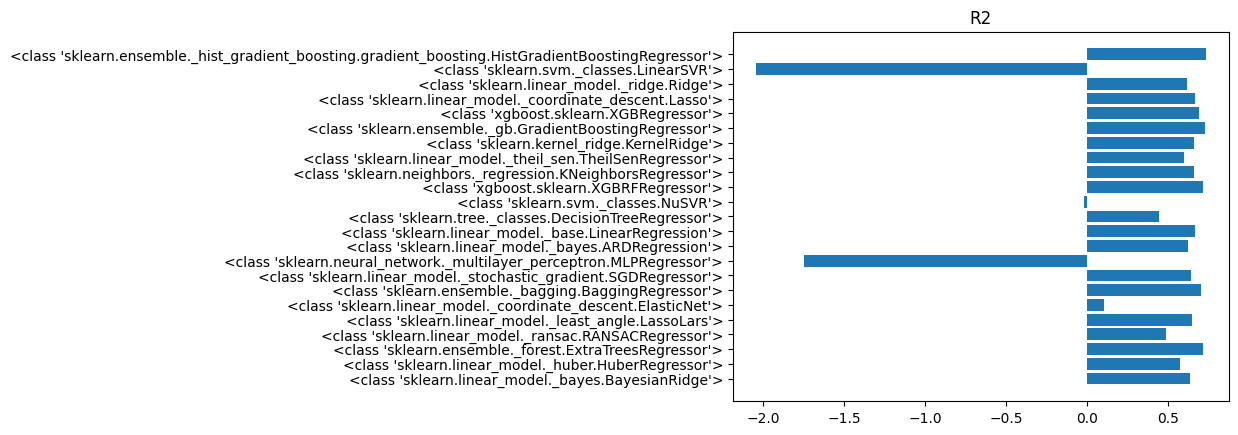

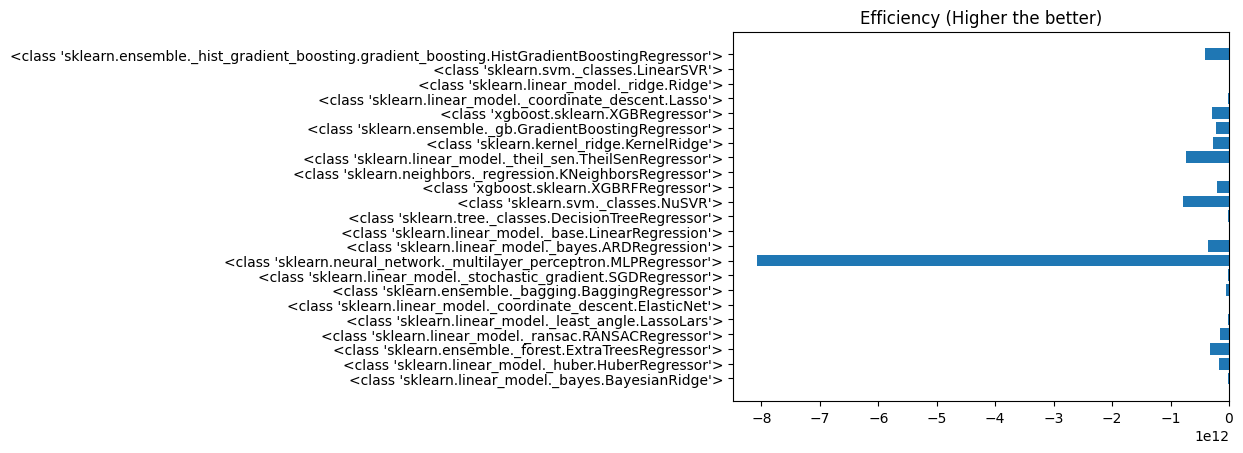

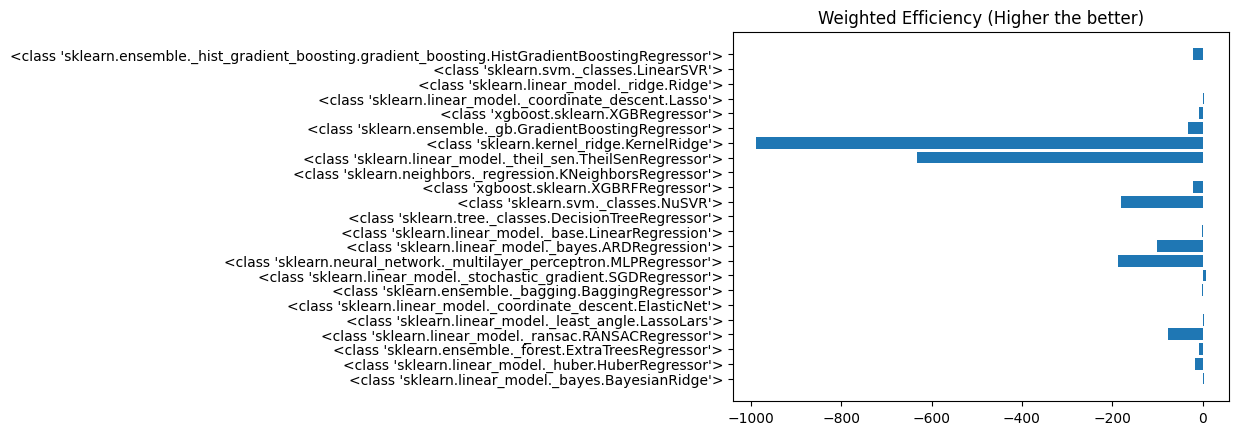

In [14]:
plot_results(housing_results)


In [15]:
quality_X = quality.drop(['quality'], axis=1)
quality_y = quality['quality']
housing_X = housing\
    .drop(['id', 'date', 'zipcode',
           'lat', 'long', 'price'], axis=1)
housing_y = housing['price']


In [246]:
from statistics import mode
import numpy as np
import pandas as pd
from numba import prange
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler, MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor, HistGradientBoostingRegressor, BaggingRegressor, ExtraTreesRegressor
from sklearn.svm import SVR, NuSVR, LinearSVR
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression, BayesianRidge, ElasticNet, SGDRegressor, LassoLars, Lasso, Ridge, ARDRegression, RANSACRegressor, HuberRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from xgboost import XGBRegressor, XGBRFRegressor
from time import perf_counter
from copy import deepcopy


class VGBRegressor(object):
    def __init__(
        self,
        *,
        learning_rate: float = 0.1,
        n_estimators: int = 100,
        custom_loss=None,
        early_stopping: bool = False,
        early_stopping_min_delta: float = 0.001,
        early_stopping_patience: int = 10,
        complexity: bool = False,
        custom_models: list = None
    ):
        self.learning_rate = learning_rate
        self.n_estimators = n_estimators
        self.custom_loss = custom_loss
        self.early_stopping = early_stopping
        self._X = None
        self._y = None
        if custom_models:
            self._models = custom_models
        else:
            if complexity:
                self._models = (DecisionTreeRegressor, LinearRegression, BayesianRidge, KNeighborsRegressor, ExtraTreesRegressor,
                                ElasticNet, LassoLars, Lasso, GradientBoostingRegressor, HistGradientBoostingRegressor,
                                BaggingRegressor, SVR, NuSVR, XGBRegressor, XGBRFRegressor, SGDRegressor, KernelRidge, MLPRegressor,
                                Ridge, ARDRegression, RANSACRegressor, HuberRegressor, TheilSenRegressor)
            else:
                self._models = (DecisionTreeRegressor, LinearRegression, BayesianRidge, KNeighborsRegressor,
                                ElasticNet, LassoLars, Lasso, SGDRegressor, BaggingRegressor,
                                Ridge, ARDRegression, RANSACRegressor, ExtraTreesRegressor)
        self._ensemble = []

    def _metrics(self, vt, vp, model, time=None):
        if self.custom_loss:
            return {'model': model, 'time': time, 'loss': self.custom_loss(vt, vp)}
        return {"model": model, "time": time, "loss": mean_absolute_error(vt, vp)}

    def _create_model(self, X, y, model_name, time_it: bool = False):
        # model = Pipeline([
        #     ('scaler1', RobustScaler()),
        #     ('scaler2', MinMaxScaler()),
        #     ('model', model_name())
        # ])
        model = model_name()
        if time_it:
            begin = perf_counter()
            model.fit(X, y)
            end = perf_counter()
            return (model, end - begin)
        return (model.fit(X, y), None)

    def _get_metrics(self, model_name):
        Xt, Xv, yt, yv = train_test_split(self._X, self._y)
        results = self._create_model(Xt, yt, model_name, time_it=False)
        model, time = results[0], results[1]
        return self._metrics(yv,
                             model.predict(Xv), model, time)

    def _get_results(self, X, y) -> list:
        results = []
        self._X = MinMaxScaler().fit_transform(RobustScaler().fit_transform(X))
        self._y = y
        with ThreadPoolExecutor(max_workers=len(self._models)) as executor:
            res = executor.map(self._get_metrics, self._models)
            # for i in 
            results = [i for i in res if i]
        return results
        for i in self._models:
            try:
                results.append(self._get_metrics(X, y, i))
            except Exception:
                pass
        return results

    def fit(
        self, X_train, y_train,
        early_stopping: bool = False,
        early_stopping_min_delta: float = 0.001,
        early_stopping_patience: int = 10,
        custom_models: list = None,
        learning_rate: float = 0.1,
        n_estimators: int = 100,
        warm_start: bool = False,
        complexity: bool = False,
    ):
        if custom_models:
            self._models = custom_models
        self.learning_rate = learning_rate
        self.n_estimators = n_estimators
        self.early_stopping = early_stopping
        self.early_stopping_min_delta = early_stopping_min_delta
        self.early_stopping_patience = early_stopping_patience
        if custom_models:
            self._models = custom_models
        else:
            if complexity:
                self._models = (DecisionTreeRegressor, LinearRegression, BayesianRidge, KNeighborsRegressor, ExtraTreesRegressor,
                                ElasticNet, LassoLars, Lasso, GradientBoostingRegressor, HistGradientBoostingRegressor,
                                BaggingRegressor, NuSVR, XGBRegressor, XGBRFRegressor, SGDRegressor, KernelRidge, MLPRegressor,
                                Ridge, ARDRegression, RANSACRegressor, HuberRegressor, TheilSenRegressor)
            else:
                self._models = (DecisionTreeRegressor, LinearRegression, BayesianRidge, KNeighborsRegressor,
                                ElasticNet, LassoLars, Lasso, SGDRegressor, BaggingRegressor,
                                Ridge, ARDRegression, RANSACRegressor, ExtraTreesRegressor)
        X_train = deepcopy(X_train)
        # base model: mean
        # computer residuals: y - y hat
        # for n_estimators: a) y = prev residuals && residuals * learning rate
        # add early stopping
        # restore best weights
        # ada boost and adaptive scaling for learning rates

        preds = pd.DataFrame(
            data={'p0': np.full((len(y_train)), y_train.mean(skipna=True))})
        residuals = pd.DataFrame(
            data={'r0': y_train - y_train.mean(skipna=True)})
        if not early_stopping:
            if warm_start:
                for i in prange(1, self.n_estimators + 1):
                    if i == 1:
                        y = residuals['r0']
                    else:
                        y = preds[f'p{i - 1}']
                    results = self._get_results(X_train, y)
                    min_loss = min(results, key=lambda x: x.get(
                        "loss", float))["loss"]  # https://stackoverflow.com/a/19619294
                    min_model = [i['model']
                                for i in results if min_loss >= i['loss']][0]
                    preds[f'p{i}'] = residuals.sum(axis=1) + min_model.predict(
                        X_train) * self.learning_rate
                    residuals[f'r{i}'] = y - preds[f'p{i}']
                    if warm_start:
                        X_train[f'r{i}'] = y
                    self._ensemble.append(min_model)
            else:
                for i in prange(1, self.n_estimators + 1):
                    if i == 1:
                        y = residuals['r0']
                    else:
                        y = preds[f'p{i - 1}']
                    results = self._get_results(X_train, y)
                    min_loss = min(results, key=lambda x: x.get(
                        "loss", float))["loss"]  # https://stackoverflow.com/a/19619294
                    min_model = [i['model']
                                for i in results if min_loss >= i['loss']][0]
                    preds[f'p{i}'] = residuals.sum(axis=1) + min_model.predict(
                        X_train) * self.learning_rate
                    residuals[f'r{i}'] = y - preds[f'p{i}']
                    self._ensemble.append(min_model)
        else:
            return "TODO"
        return self._ensemble, residuals.mean()


In [247]:
model = VGBRegressor()


In [248]:
models, res = model.fit(quality_X, quality_y, n_estimators=50, warm_start=False)


c:\Users\Admin\Desktop\aitfdl\variational-gradient-boosting\env\lib\site-packages\sklearn\linear_model\_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
c:\Users\Admin\Desktop\aitfdl\variational-gradient-boosting\env\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(
c:\Users\Admin\

In [ ]:
models

[KNeighborsRegressor(),
 DecisionTreeRegressor(),
 DecisionTreeRegressor(),
 BaggingRegressor(),
 ExtraTreesRegressor()]

<AxesSubplot: >

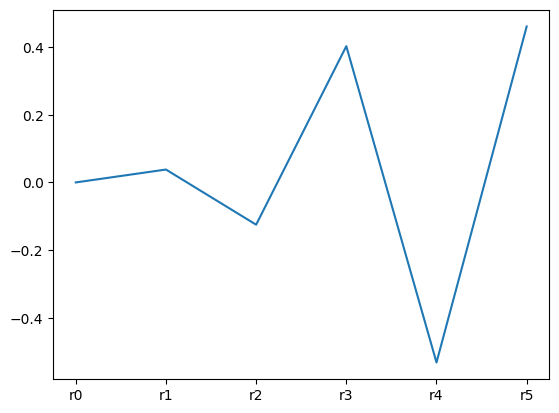

In [ ]:
res.plot()

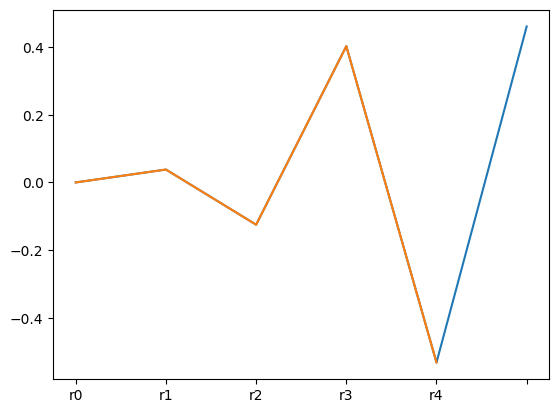

In [ ]:
res.plot()
res[:[i for i in prange(len(res)) if res[i] == res.min()][0] + 1].plot();

In [ ]:
/len models


5